In [1]:
import numpy as np
import utils 

# Caricamento dei datasets

In [18]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

# Estrazione delle frequenze di campionamento e plot delle stesse

2000 200000
600 384000


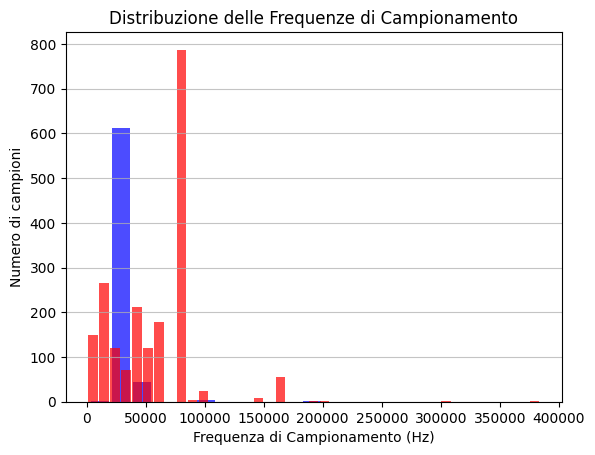

In [19]:
#TODO analisi per il resembling shannon Nyquist 
#TODO da modificare --> non prendere i duplicati 
frequenciesTarget = utils.extractFrequencies(audio_files_target)
frequenciesNonTarget = utils.extractFrequencies(audio_files_nonTarget)
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

Caricamento dataset nel dataframe

In [2]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [3]:
df_paths, df_names

(                                               FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4                 Dataset/Target/Tug/20171210-49_49.wav
 ...                                                 ...
 2658  Dataset/Non-Target/Fin, Finback Whale/6104700F...
 2659  Dataset/Non-Target/Fin, Finback Whale/61064009...
 2660  Dataset/Non-Target/Fin, Finback Whale/6106400O...
 2661  Dataset/Non-Target/Fin, Finback Whale/SanctSou...
 2662  Dataset/Non-Target/Red grouper/SanctSound_FK03...
 
 [2663 rows x 1 columns],
                                                FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4 

# Ricerca ed eliminazione dei duplicati

In [4]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [681, 2520], '7202100T.wav': [680, 2519], '7202100V.wav': [676, 2518], '7202100Z.wav': [707, 2527], '7702800U.wav': [1377, 2349], '7702800V.wav': [1384, 2358], '7702800X.wav': [1422, 2402], '7702801F.wav': [1379, 2351], '7702801M.wav': [1410, 2395], '78018002.wav': [702, 2525], '78018003.wav': [701, 2524], '7801800B.wav': [692, 2523], '7801800D.wav': [703, 2526], '7801800H.wav': [682, 2521], '7801800J.wav': [675, 2517], '84016002.wav': [2235, 2392], '8401600B.wav': [2251, 2399], '84021003.wav': [2342, 2429], '91012009.wav': [1875, 2368], '9101200B.wav': [1893, 2393], '9101200K.wav': [1871, 2361], '9101201E.wav': [1886, 2388], '91012022.wav': [1877, 2382], '91012048.wav': [1907, 2417], '91012049.wav': [1908, 2418]}


Salvataggio del dizionario in un file json

In [5]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

# Eliminazione duplicati

In [6]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [7]:
df_names, df_paths

(                                               FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4                                    20171210-49_49.wav
 ...                                                 ...
 2658                                       6104700F.wav
 2659                                       61064009.wav
 2660                                       6106400O.wav
 2661   SanctSound_SB03_05_finwhale_20190923T074930Z.wav
 2662  SanctSound_FK03_01_redgrouper_20190201T054658Z...
 
 [2636 rows x 1 columns],
                                                FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4 

In [26]:
#TODO dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
# TODO Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

# Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [27]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [28]:
audio_durations

[6.501587301587302,
 330.0,
 644.0,
 1750.0,
 190.0,
 636.0,
 921.0,
 400.0,
 240.0,
 866.0,
 773.0,
 534.0,
 200.0,
 233.0,
 654.0,
 387.0,
 674.0,
 1199.0,
 860.0,
 497.0,
 718.0,
 786.0,
 861.0,
 770.0,
 576.0,
 602.0,
 656.0,
 546.0,
 573.0,
 1147.0,
 730.0,
 400.0,
 739.0,
 653.0,
 310.0,
 348.0,
 263.0,
 662.0,
 508.0,
 326.0,
 614.0,
 516.0,
 564.0,
 630.0,
 460.0,
 203.0,
 370.0,
 350.0,
 1032.0,
 567.0,
 746.0,
 1051.0,
 626.0,
 336.0,
 390.0,
 263.0,
 889.0,
 357.0,
 723.0,
 612.0,
 334.0,
 612.0,
 813.0,
 531.0,
 389.0,
 267.0,
 290.0,
 504.0,
 417.0,
 931.0,
 439.0,
 303.0,
 440.0,
 221.0,
 200.0,
 300.0,
 279.0,
 300.0,
 347.0,
 276.0,
 10.518639455782314,
 667.0,
 538.0,
 339.0,
 351.0,
 360.0,
 357.0,
 383.0,
 537.0,
 229.0,
 373.0,
 559.0,
 291.0,
 370.0,
 543.0,
 341.0,
 186.0,
 500.0,
 464.0,
 568.0,
 202.0,
 540.0,
 196.0,
 465.0,
 344.0,
 37.151927437641724,
 368.0,
 226.0,
 498.0,
 382.0,
 442.0,
 336.0,
 378.0,
 361.0,
 250.0,
 736.0,
 297.0,
 354.0,
 372.0,
 395.

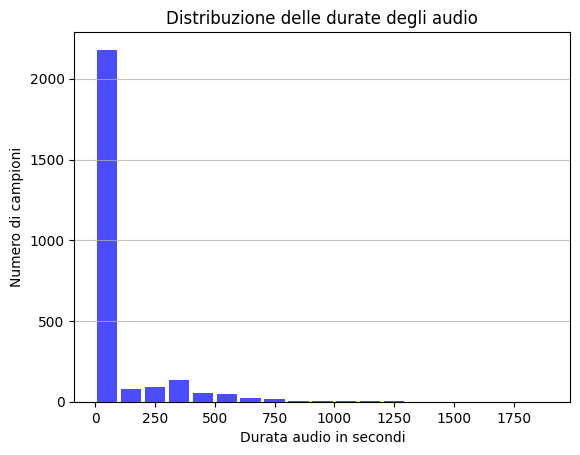

In [29]:
utils.plot_durations(audio_durations)

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore

# Analisi delle frequenze

In [8]:
audio_files = utils.get_audio_files('Dataset/df_paths.csv')

Promemoria: gli audio troppo corti sono stati saltati. va bene come cosa? 

In [ ]:
max_frequencies = utils.analyze_max_frequencies(audio_files)
utils.plot_max_frequencies(max_frequencies)

/Users/daniela/anaconda3/envs/bio/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


In [ ]:
utils.boxplot_max_frequencies(max_frequencies)

In [ ]:
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

In [ ]:
bitrates = utils.analyze_bitrate(audio_files)
utils.plot_bitrates(bitrates)

# Analisi sulla distribuzione delle classi

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_class_distribution(df, class_column):
    # Calcola la distribuzione delle classi
    class_distribution = df[class_column].value_counts()

    # Crea un plot a barre della distribuzione delle classi
    plt.figure(figsize=(10, 6))
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()


In [ ]:
import pandas as pd
import os

# Carica il DataFrame da df_paths.csv
df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_paths_copy = df_paths.copy()

# Estrai la classe e il target dai percorsi dei file
df_paths_copy['class'] = df_paths_copy['path'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_paths_copy['target'] = df_paths_copy['path'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Ora il DataFrame df_paths_copy contiene le nuove colonne 'class' e 'target'

In [ ]:
plot_class_distribution(df_paths_copy, 'class')